In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utilis as u
import importlib
import model_bonus as m 
import mlp as ml

Using TensorFlow backend.


In [2]:
filename = '/data_batch_1'
X_train, y_train,Y_train = u.load_data(filename, reshape=False, clipping=True)
meanX = np.mean(X_train,axis=1)
stdX = np.std(X_train,axis=1)
X_train = (X_train-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/data_batch_2'
X_val, y_val,Y_val = u.load_data(filename, reshape=False, clipping=True)
X_val = (X_val-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/test_batch'
X_test, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)
X_test = (X_test-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

data = {'X_train':X_train, 'Y_train':Y_train, 'y_train':y_train,'X_val':X_val, 'Y_val':Y_val, 'y_val':y_val}

# test data augmentation with two different settings

In [3]:
importlib.reload(m)
ns = 2*np.floor(X_train.shape[1]/100)
settings = [{"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0},{"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.01},{"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.1}]
for GDparams in settings:
    mlp = m.MLP(lambda_=GDparams['lambda'])  
    mlp.cyclicLearning(data, GDparams, 'data_augmentation', False,True, False, True)
    mlp = m.MLP(lambda_=GDparams['lambda'])  
    mlp.cyclicLearning(data, GDparams, 'no_data_augmentation', False,False, False, True)


100%|██████████| 20/20 [08:41<00:00, 26.08s/it]


# test ensemble learning

In [4]:
importlib.reload(m)
ns = 2*np.floor(X_train.shape[1]/100)
settings = [{"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0},{"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.01},{"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.1}]

for GDparams in settings:
    mlp = m.MLP(lambda_=GDparams['lambda'])  
    mlp.cyclicLearning(data, GDparams, 'ensemble_learning', True,False, False, True)
    mlp = m.MLP(lambda_=GDparams['lambda'])  
    mlp.cyclicLearning(data, GDparams, 'no_ensemble_learning', False,False, False, True)

100%|██████████| 20/20 [03:40<00:00, 11.01s/it]


# tets different number of hidden units 

In [5]:
settings = [(0.001,50),(0.005,100),(0.01,200),(0.05,400)]
GDparams = {"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':1e-1, 'ns':ns, 'n_cycles':5, 'freq':10,'lambda':0.01}
for setting in settings:
    lambda_ = setting[0] 
    d = setting[1]
    dimensions = [3072,d,10]
    mlp = m.MLP(lambda_=lambda_,dimensions=dimensions)  
    mlp.cyclicLearning(data, GDparams, 'test_hidden_units', False,False, True, True)

poch 240.0: train_cost = 1.9264195886933781, val_cost = 2.149999392476652,  
 	 train_acc = 0.4857, val_acc = 0.406
	 Epoch 280.0: train_cost = 1.8327456262507984, val_cost = 2.082434853596394,  
 	 train_acc = 0.5159, val_acc = 0.4239
 15%|█▌        | 3/20 [00:36<03:32, 12.49s/it]	 Epoch 320.0: train_cost = 1.7658598253624822, val_cost = 2.039909930211517,  
 	 train_acc = 0.5399, val_acc = 0.4363
	 Epoch 360.0: train_cost = 1.7180039101060909, val_cost = 2.012527689134614,  
 	 train_acc = 0.5656, val_acc = 0.4435
 20%|██        | 4/20 [00:46<03:06, 11.67s/it]	 Epoch 0.0: train_cost = 1.6928072401199497, val_cost = 1.9971498340394187,  
 	 train_acc = 0.5734, val_acc = 0.4498
	 Epoch 40.0: train_cost = 1.691337203814443, val_cost = 2.000624653339288,  
 	 train_acc = 0.5721, val_acc = 0.4454
	 Epoch 80.0: train_cost = 1.7048311099625444, val_cost = 2.023284858049729,  
 	 train_acc = 0.5594, val_acc = 0.43
 25%|██▌       | 5/20 [00:59<03:01, 12.08s/it]	 Epoch 120.0: train_cost = 1.69

# find etas


100%|██████████| 8/8 [01:20<00:00, 10.11s/it]


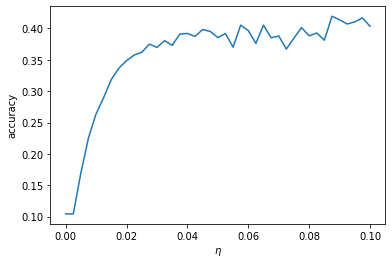

lambda = 0.001, d = 50

100%|██████████| 8/8 [01:25<00:00, 10.70s/it]


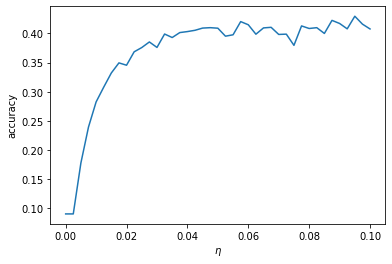

lambda = 0.005, d = 100

100%|██████████| 8/8 [01:55<00:00, 14.47s/it]


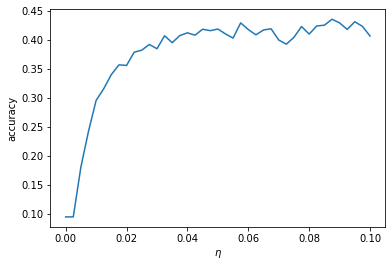

lambda = 0.01, d = 200

100%|██████████| 8/8 [02:39<00:00, 19.90s/it]


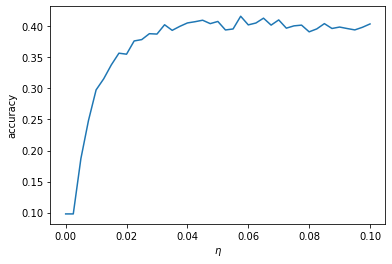

lambda = 0.05, d = 400


In [7]:
importlib.reload(m)
settings = [(0.001,50),(0.005,100),(0.01,200),(0.05,400)]
GDparams = {"epochs":8, "n_batch":100, "eta_min":1e-10,'eta_max':1e-1,'freq':20}
for setting in settings:
    lambda_ = setting[0]
    d = setting[1]
    dimensions = [3072,d,10]
    mlp = m.MLP(lambda_=lambda_,dimensions=dimensions)
    hist = mlp.find_etas(data, GDparams)
    plt.plot(hist['etas'],hist['val_acc'])
    plt.xlabel(r"$\eta$")
    plt.ylabel('accuracy')
    plt.show()
    print(f"lambda = {lambda_}, d = {d}")

# final network

In [5]:
len(hist['val_acc'])

41

In [5]:
importlib.reload(m)
X_train_whole, y_train_whole, Y_train_whole = u.load_data('/data_batch_1', clipping=True)
for i in range(2,6):
    X, y, Y = u.load_data('/data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)

X_val_small, y_val_small, Y_val_small = X_train_whole[:,-5000:], y_train_whole[-5000:], Y_train_whole[:,-5000:]
X_train_whole, y_train_whole, Y_train_whole = X_train_whole[:,:-5000], y_train_whole[:-5000], Y_train_whole[:,:-5000]

## normalize with mean and std of train set 
mean = np.mean(X_train_whole, axis=1)
std = np.std(X_train_whole, axis=1)

X_train_whole -= np.outer(mean, np.ones(X_train_whole.shape[1]))
X_train_whole /= np.outer(std, np.ones(X_train_whole.shape[1]))

X_val_small -= np.outer(mean, np.ones(X_val_small.shape[1]))
X_val_small /= np.outer(std, np.ones(X_val_small.shape[1]))

data = {'X_train':X_train_whole, 'Y_train':Y_train_whole, 'y_train':y_train_whole,'X_val':X_val_small, 'Y_val':Y_val_small, 'y_val':y_val_small}

In [9]:
ns = 2*np.floor(X_train.shape[1]/100)
GDparams = {"epochs":10, "n_batch":100, "eta_min":1e-4,'eta_max':6e-3, 'ns':ns, 'n_cycles':5, 'freq':10}
dimensions = [3072,200,10]
for seed in range(5):
    mlp = m.MLP(lambda_=0,dimensions=dimensions,seed=seed)  
    mlp.cyclicLearning(data, GDparams, 'final network', False,False, True, True)

: train_cost = 1.6020643105939518, val_cost = 1.6266635694472482,  
 	 train_acc = 0.44653333333333334, val_acc = 0.4274
	 Epoch 200.0: train_cost = 1.6010612339184889, val_cost = 1.6296524343040983,  
 	 train_acc = 0.44526666666666664, val_acc = 0.4284
	 Epoch 240.0: train_cost = 1.5926644964850427, val_cost = 1.617981960388297,  
 	 train_acc = 0.448, val_acc = 0.432
	 Epoch 280.0: train_cost = 1.5849909538010938, val_cost = 1.6147062905334013,  
 	 train_acc = 0.4508, val_acc = 0.4308
	 Epoch 320.0: train_cost = 1.5788140626996894, val_cost = 1.6103191197855076,  
 	 train_acc = 0.45284444444444444, val_acc = 0.4318
	 Epoch 360.0: train_cost = 1.57481511557213, val_cost = 1.6055436724683678,  
 	 train_acc = 0.4555111111111111, val_acc = 0.432
	 Epoch 0.0: train_cost = 1.5732050098309622, val_cost = 1.6037126185659116,  
 	 train_acc = 0.4567333333333333, val_acc = 0.4326
	 Epoch 40.0: train_cost = 1.5723376574100658, val_cost = 1.6028653489599773,  
 	 train_acc = 0.45695555555555